In [3]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import dataset

path = r'/Users/neroshakrishna/Desktop/P/Learning/Data_Analysis/CareerFoundry/Data Immersion/Achievement_4/Instacart Basket Analysis'
df_ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_group.pkl'))

In [3]:
df_ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_prices,spending_flag,user_median_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,NaN,nan,NaN,nan
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,slowest busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,slowest busy,Most orders,10,New customer,7.515897,Low spender,13.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,slowest busy,Average orders,10,New customer,8.197727,Low spender,10.0,Frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,slowest busy,Most orders,10,New customer,8.205556,Low spender,20.0,Regular customer


In [4]:
df_ords_prods_merge.shape

(32404859, 24)

<Axes: xlabel='orders_day_of_week'>

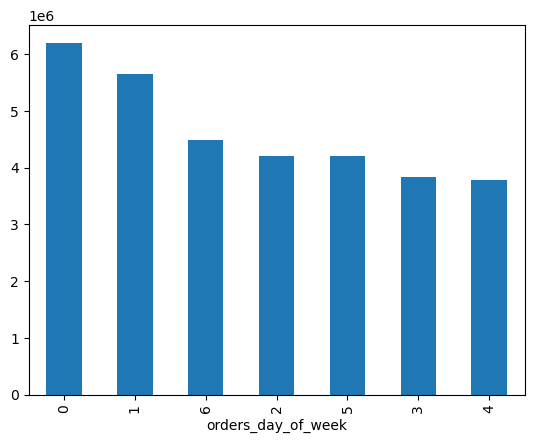

In [5]:
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

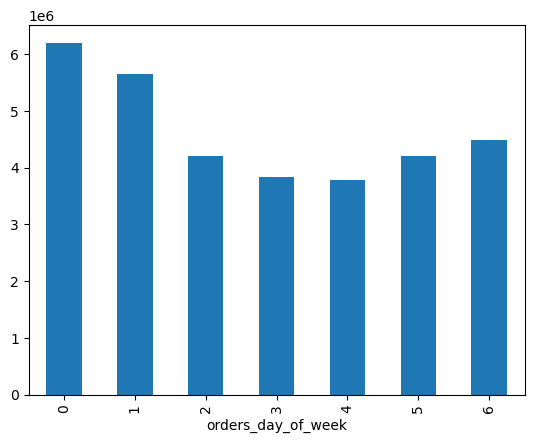

In [6]:
df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
df_ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [8]:
df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

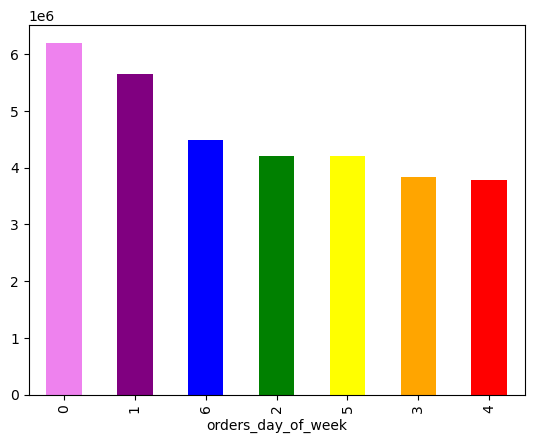

In [9]:
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['Violet', 'Purple', 'BLue', 'Green', 'Yellow', 'Orange', 'Red' ])

In [ ]:
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['Violet', 'Purple', 'BLue', 'Green', 'Yellow', 'Orange', 'Red' ])

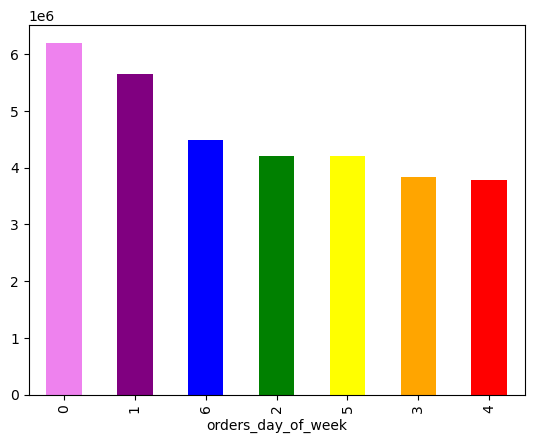

In [11]:
bar.figure

In [13]:
bar.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_orders_dow.png'))

### Histogram

<Axes: ylabel='Frequency'>

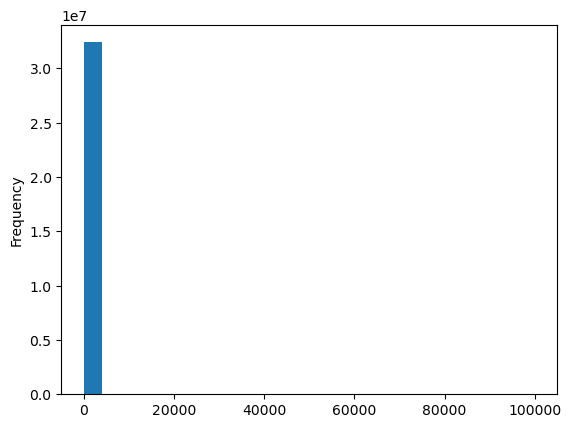

In [14]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

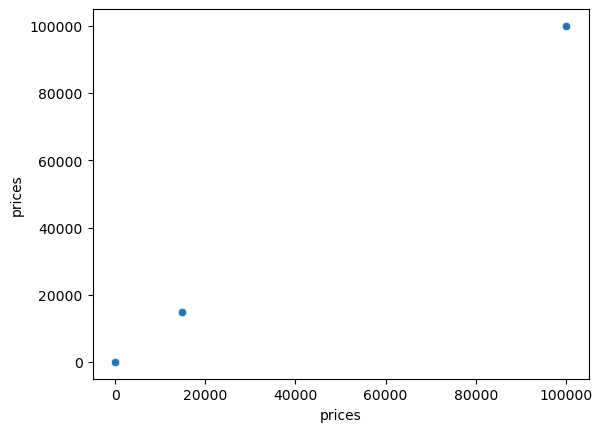

In [15]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [12]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_prices,spending_flag,user_median_order,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,NaN,nan,NaN,nan
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,NaN,nan,NaN,nan
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,NaN,nan,NaN,nan
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,NaN,nan,NaN,nan
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,NaN,nan,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,NaN,nan,NaN,nan
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,NaN,nan,NaN,nan
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,slowest busy,Most orders,15,Regular customer,NaN,nan,NaN,nan
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,slowest busy,Average orders,12,Regular customer,NaN,nan,NaN,nan


In [13]:
# Marking outliers as missing values
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [14]:
df_ords_prods_merge['prices'].max()

25.0

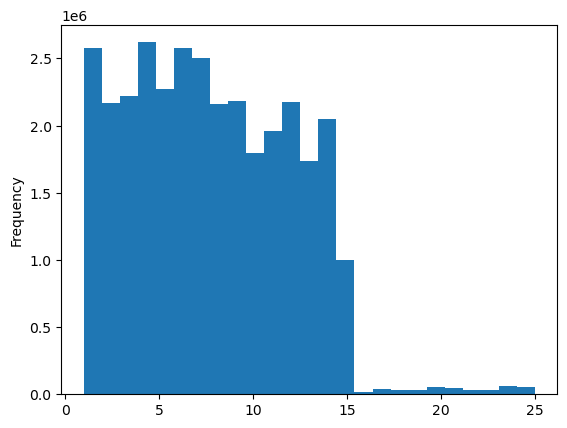

In [27]:
# Histogram after cleaning the outliers in the price column

hist = df_ords_prods_merge['prices'].plot.hist(bins = 25)

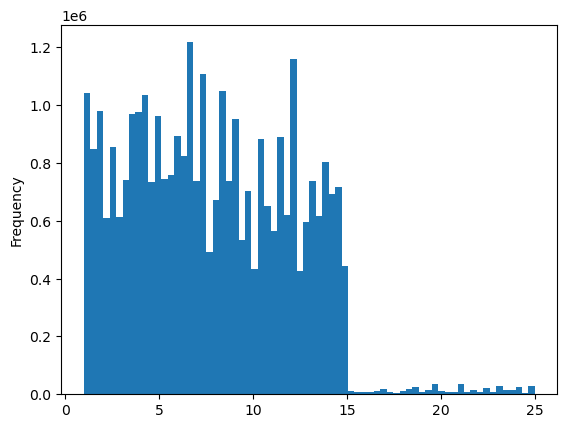

In [29]:
hist2 = df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [30]:
hist2.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'hist_orders_dow.png'))

In [6]:
# Creating a list  holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [7]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [8]:
# Store 70% of the sample in the dataframe big

big = df_ords_prods_merge[dev]

In [9]:
# Store 30% of the sample in the dataframe big

small = df_ords_prods_merge[~dev]

In [36]:
len(df_ords_prods_merge)

32404859

In [39]:
len(big) + len(small)

32404859

In [10]:
df_2 = small[['orders_day_of_week','prices']]

/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


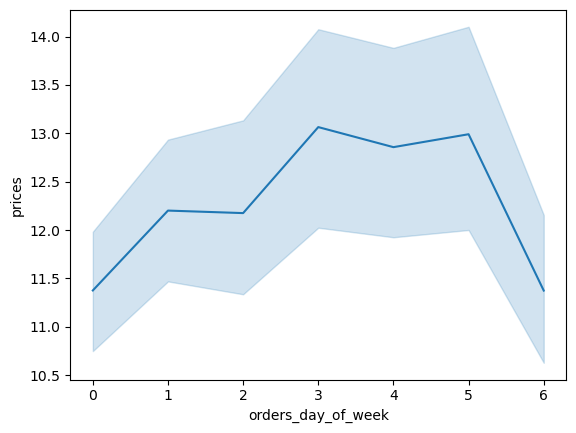

In [15]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [16]:
line.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'line_orders_dow.png'))

## Task Part 2

In [ ]:
# Customer data set from part 1 of the task.

df_ords_cust = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'customer_order.pkl'))

In [9]:
df_ords_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,dependants,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


### Q3. ou need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

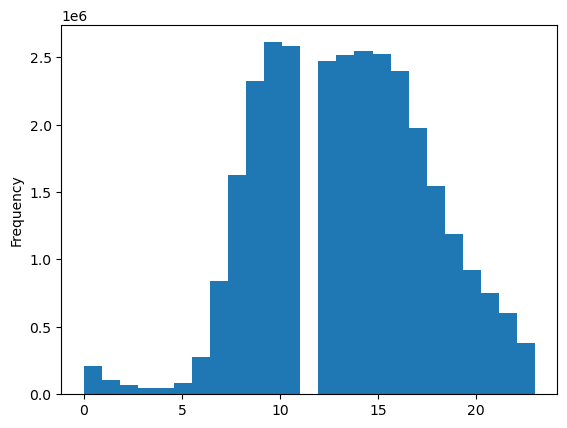

In [37]:
hist_3 = df_ords_cust['order_hour_of_day'].plot.hist(bins = 25)

#### There is a noticeable trend in ordering behavior throughout the day. For example, there is a significant increase in orders starting from the early morning (around 7 AM) until late morning, with a peak around 10 AM. Another peak is observed during the late afternoon, around 4 PM to 6 PM

In [38]:
hist_3.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'hist_order_hour_of_day.png'))

In [13]:
df_ords_cust['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      206659
1      109281
2       65188
3       47802
4       49418
5       83273
6      275016
7      841413
8     1623690
9     2320463
10    2609878
11    2585887
12    2474099
13    2517264
14    2543388
15    2519570
16    2398341
17    1973941
18    1543892
19    1189761
20     921249
21     752663
22     598927
23     378678
Name: count, dtype: int64

 ### Q4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

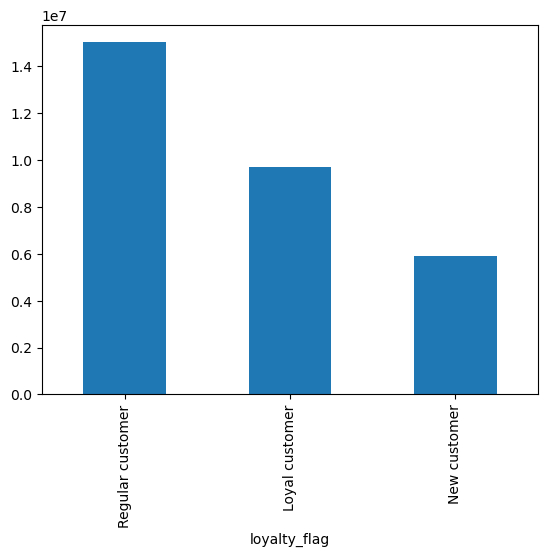

In [39]:
bar1 = df_ords_cust['loyalty_flag'].value_counts().plot.bar()

In [40]:
bar1.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'loyalty.png'))

### Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [16]:
# Creating a sample subset of df_ords_cust dataset
# Creating a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df_ords_cust)) <= 0.7

In [17]:
dev

array([False,  True, False, ..., False,  True,  True])

In [18]:
# Store 70% of the sample in the dataframe big

big = df_ords_cust[dev]

In [19]:
# Store 30% of the sample in the dataframe big

small = df_ords_cust[~dev]

In [20]:
len(df_ords_cust)

30629741

In [21]:
len(big) + len(small)

30629741

In [23]:
df_3 = small[['order_hour_of_day','prices']]

/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


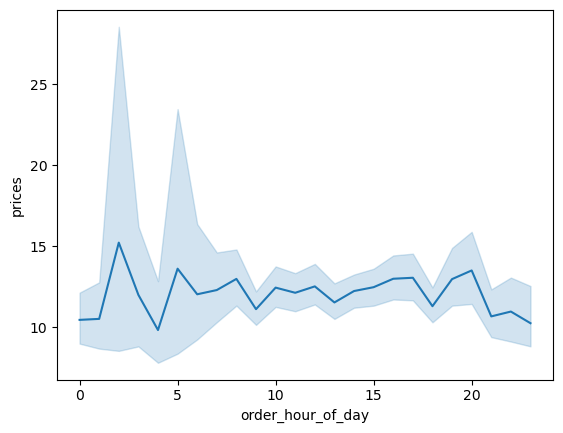

In [24]:
line = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [41]:
line.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'price_OrderHourOfDay.png'))

### Q6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [30]:
df_4 = small[['age','dependants']]

/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


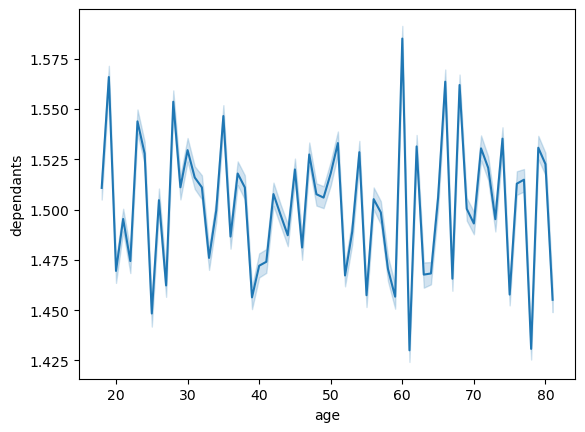

In [35]:
line1 = sns.lineplot(data = df_4, x = 'age',y = 'dependants')

In [42]:
line1.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'age_dependents.png'))

#### As shown in the graph, there is no correlation between age and the number of dependents.

In [32]:
small.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,dependants,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
10,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


### Q7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

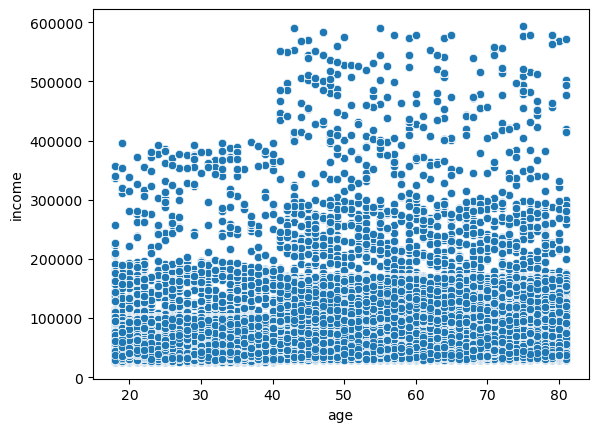

In [43]:
scatt = sns.scatterplot(x='age', y='income', data=small)

#### People under the age of 40 typically have incomes below 400,000, whereas individuals aged 40 and above generally have incomes upto 600,000.







In [44]:
scatt.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'age_income.png'))